In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

## Periodic

In [6]:
def NP(i, k, t, tval, T: list) -> float:
    """
    Parameters
    k: b-spline order, degre of polynomial is k-1
    T: vector node
    """
    if k == 1:
        return 1 if T[i] <= tval < T[i+1] else 0
    else:
        return (t - T[i])/(T[i+k-1] - T[i])*NP(i, k-1, t, tval, T) + (T[i+k] - t)/(T[i+k] - T[i+1])*NP(i+1, k-1, t, tval, T)

def periodic_b_spline(t, tval, k, T:list, P: list):
    sk = 0
    n = len(P)
    for i in range(n):
        sk += P[i]*NP(i, k, t, tval, T)
    return sk

P = np.array([[150, 35.5],
              [160, 37.8],
              [170, 43.6],
              [180, 45.7],
              [190, 47.3],
              [200, 50.1],
              [210, 51.2]])

k = 3       # order of b-spline
n = len(P)  # number of points
T = [i for i in range(n+k)]

### Polynomial

In [7]:
t = sp.symbols('t')
M = []
for tval in range(k - 1, n):
    X = periodic_b_spline(t, tval, k, T, P)
    M.append([sp.expand(X[0]), sp.expand(X[1]), tval, tval + 1])
print("Polynomial and Interval")

for row in M:
    print(f"t ϵ {row[2], row[3]}")
    print(f"x(t)={sp.N(row[0], 5)}\ny(t)={sp.N(row[1], 5)}")

Polynomial and Interval
t ϵ (2, 3)
x(t)=10.0*t + 135.0
y(t)=1.75*t**2 - 4.7*t + 39.05
t ϵ (3, 4)
x(t)=10.0*t + 135.0
y(t)=-1.85*t**2 + 16.9*t + 6.65
t ϵ (4, 5)
x(t)=10.0*t + 135.0
y(t)=-0.25*t**2 + 4.1*t + 32.25
t ϵ (5, 6)
x(t)=10.0*t + 135.0
y(t)=0.6*t**2 - 4.4*t + 53.5
t ϵ (6, 7)
x(t)=10.0*t + 135.0
y(t)=-0.85*t**2 + 13.0*t + 1.3


### Plot

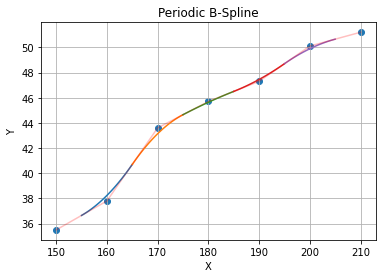

In [8]:
m = len(M)
for row in M:
    x_interval, y_interval = row[0], row[1]
    t_interval = np.linspace(row[2], row[3], 100)
    plt.plot([x_interval.subs(t, i) for i in t_interval], [y_interval.subs(t, i) for i in t_interval])

plt.scatter(P[:, 0], P[:, 1])
plt.plot(P[:, 0], P[:, 1], c='red',  alpha=0.25)
plt.title("Periodic B-Spline")
plt.grid(True)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## Non Periodic

In [16]:
def NNP(i, k, t, tval, T: list) -> float:
    """
    Parameters
    k: b-spline order, degre of polynomial is k-1
    T: vector node
    """
    if k == 1:
        if T[i] <= tval < T[i+1]:
            return 1
        else:
            return 0
    else:
        d1 = T[i+k-1] - T[i]
        d2 = T[i+k] - T[i+1]

        if d1 != 0 and d2 != 0:
            return (t - T[i])/d1*NNP(i, k-1, t, tval, T) + (T[i+k] - t)/d2*NNP(i+1, k-1, t, tval, T)
        elif d1 == 0 and d2 != 0:
            return (T[i+k] - t)/d2*NNP(i+1, k-1, t, tval, T)
        elif d1 != 0 and d2 == 0:
            return (t - T[i])/d1*NNP(i, k-1, t, tval, T)
        else:
            return 0

def nonperiodic_b_spline(t: float,tval, k: int, T: list, P: list):
    sk = 0
    for i in range(len(P[:, 0])):
        sk += P[i]*NNP(i, k, t, tval, T)
    return sk

P = np.array([[150, 35.5],
              [160, 37.8],
              [170, 43.6],
              [180, 45.7],
              [190, 47.3],
              [200, 50.1],
              [210, 51.2]])
k = 3           # order of b-spline
n = len(P) - 1  # intex of last point
m = n + k

T = np.zeros(m + 1)
i = 1
for j in range(k, m - k + 1):
    T[j] = i
    i += 1

for j in range(m - k + 1, m + 1):
    T[j] = i

### Polynomial

In [17]:
t = sp.symbols('t')
M = []
for tval in range(n - k + 2):
    X = nonperiodic_b_spline(t, tval, k, T, P)
    M.append([sp.expand(X[0]), sp.expand(X[1]), tval, tval + 1])
print("Polynomial and Interval")

for row in M:
    print(f"t ϵ {row[2], row[3]}")
    print(f"x(t)={row[0]}\ny(t)={row[1]}")

Polynomial and Interval
t ϵ (0, 1)
x(t)=-5.0*t**2 + 20.0*t + 150.0
y(t)=0.600000000000001*t**2 + 4.59999999999999*t + 35.5
t ϵ (1, 2)
x(t)=10.0*t + 155.0
y(t)=-1.85*t**2 + 9.50000000000001*t + 33.05
t ϵ (2, 3)
x(t)=10.0*t + 155.0
y(t)=-0.250000000000004*t**2 + 3.10000000000002*t + 39.45
t ϵ (3, 4)
x(t)=10.0*t + 155.0
y(t)=0.600000000000005*t**2 - 2.00000000000006*t + 47.1000000000001
t ϵ (4, 5)
x(t)=5.0*t**2 - 30.0*t + 235.0
y(t)=-0.300000000000008*t**2 + 5.20000000000002*t + 32.7


### Plot

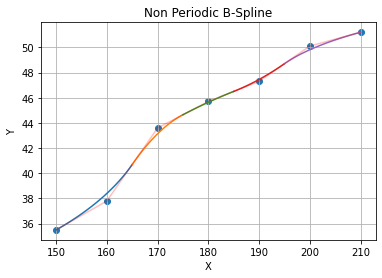

In [18]:
m = len(M)
for row in M:
    x_interval, y_interval = row[0], row[1]
    t_interval = np.linspace(row[2], row[3], 100)
    plt.plot([x_interval.subs(t, i) for i in t_interval], [y_interval.subs(t, i) for i in t_interval])

plt.scatter(P[:, 0], P[:, 1])
plt.plot(P[:, 0], P[:, 1], c='red',  alpha=0.25)
plt.title("Non Periodic B-Spline")
plt.grid(True)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

### Práctica Calificada 2, Pregunta 4

Polynomial and Interval
t ϵ (0, 1)
x(t)=0.241666666666668*t**3 - 0.450000000000001*t**2 + 2.1*t + 2.0
y(t)=2.06666666666667*t**3 - 6.6*t**2 + 8.4*t + 5.0
t ϵ (1, 2)
x(t)=-0.125*t**3 + 0.650000000000001*t**2 + 0.999999999999997*t + 2.36666666666667
y(t)=-0.0333333333333332*t**3 - 0.300000000000001*t**2 + 2.1*t + 7.1
t ϵ (2, 3)
x(t)=0.0333333333333334*t**3 - 0.300000000000002*t**2 + 2.90000000000001*t + 1.09999999999999
y(t)=0.216666666666667*t**3 - 1.8*t**2 + 5.10000000000001*t + 5.09999999999999
t ϵ (3, 4)
x(t)=0.166666666666667*t**3 - 1.5*t**2 + 6.5*t - 2.49999999999999
y(t)=-0.0833333333333339*t**3 + 0.900000000000006*t**2 - 3.00000000000001*t + 13.2
t ϵ (4, 5)
x(t)=-0.166666666666667*t**3 + 2.5*t**2 - 9.49999999999997*t + 18.8333333333333
y(t)=0.7*t**3 - 8.5*t**2 + 34.6*t - 36.9333333333334
t ϵ (5, 6)
x(t)=-0.166666666666667*t**3 + 2.5*t**2 - 9.50000000000003*t + 18.8333333333334
y(t)=-1.26666666666667*t**3 + 21.0*t**2 - 112.9*t + 208.9
t ϵ (6, 7)
x(t)=0.333333333333333*t**3 - 6.5*t

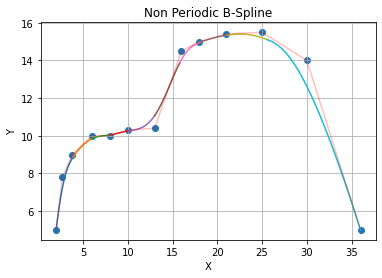

In [19]:
x_data = np.array([2, 2.7, 3.8, 6, 8, 10, 13, 16, 18, 21, 25, 30, 36]).reshape(-1, 1)
y_data = np.array([5, 7.8, 9, 10.0, 10.0, 10.3, 10.4, 14.5, 15, 15.4, 15.5, 14, 5]).reshape(-1, 1)

P = np.append(x_data, y_data, 1)

k = 4           # order of b-spline
n = len(P) - 1  # intex of last point
m = n + k

T = np.zeros(m + 1)
i = 1
for j in range(k, m - k + 1):
    T[j] = i
    i += 1

for j in range(m - k + 1, m + 1):
    T[j] = i
    
t = sp.symbols('t')
M = []
for tval in range(n - k + 2):
    X = nonperiodic_b_spline(t, tval, k, T, P)
    M.append([sp.expand(X[0]), sp.expand(X[1]), tval, tval + 1])
print("Polynomial and Interval")

for row in M:
    print(f"t ϵ {row[2], row[3]}")
    print(f"x(t)={row[0]}\ny(t)={row[1]}")
    
m = len(M)
for row in M:
    x_interval, y_interval = row[0], row[1]
    t_interval = np.linspace(row[2], row[3], 50)
    plt.plot([x_interval.subs(t, i) for i in t_interval], [y_interval.subs(t, i) for i in t_interval])

plt.scatter(P[:, 0], P[:, 1])
plt.plot(P[:, 0], P[:, 1], c='red',  alpha=0.25)
plt.title("Non Periodic B-Spline")
plt.grid(True)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()